In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib
from pylab import rcParams
rcParams['figure.figsize'] = 16, 10
import pyproj
import matplotlib.image as image
from lxml import etree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point, Polygon, MultiPoint, MultiPolygon
from shapely.prepared import prep
from pysal.esda.mapclassify import Natural_Breaks as nb
from descartes import PolygonPatch
import fiona
from itertools import chain
from matplotlib import colors
import datetime

In [232]:
current_time = datetime.datetime.now().strftime("%d-%m-%Y %H:%M")
the_day = datetime.date.today() + datetime.timedelta(days=-1)
date_to_print = the_day.strftime("%d-%m-%y")
date_to_file = the_day.strftime("%d%m%y")
current_time_to_file = datetime.datetime.now().strftime("%Y%m%d%H%M")

## CO JESZCZE:



* NAZWY TWORZONYCH PLIKOW POWINNY ZAWIERAĆ DATĘ I ZAPISYWAC SIE W ODPOWIEDNIM FOLDERZE

* MAPA Z MAKSYMALNĄ PRZEWIDYWANĄ TEMPERATURĄ I AKTUALNĄ W NAWIASIE? I CIŚNIENIEM?


<br>
* WYKRESY Z DZIENNĄ TEMPERATURĄ I CIŚNIENIEM ATMOSFERYCZNYM DLA RYBNIKA W CIĄGU DOBY?
* ZMIENIĆ KOLEJNOŚ WYKONYWANIA!!! WAŻNE (GOTOWE)
* CO JEŚLI BĘDZIE BRAK DANYCH!? (GOTOWE)  
* CZY BĘDZIE CZYTELNIE WKLEJAJĄC NA MAPĘ LICZBY? MOŻE TYLKO SKRAJNE, TEMPERATURY DLA ŚRÓDMIEŚCIA PODAWAĆ JAKO DLA CAŁOŚCI? NIE BĘDZIE CZYTELNIE
* ZMIENIĆ NIECO GRANICĘ I USUNĄĆ KROPKĘ Z DZIELNICY NA POŁUDNIOWYM ZACHODZIE (POTEM)
* USZEREGOWAĆ DANE ALFABETYCZNIE DZIELNICAMI! GOTOWE
* JAK ZAZNACZAĆ PUNKTY NA MAPIE? (GOTOWE)
* WSZYSTKIE DANE W RAMCE POPRAWNIE ZJOINOWANE WAŻNE!!! (GOTOWE)
* ULEPSZYC PLIK SHP, (ten zapisany w geo jednostkach wrzucic na gita i z niego korzystac, drugi tylko na zapas)NAZWY DZIELNIC ZACZYNAJACE SIE WIELKĄ, POLSKIE LITERY, KODOWANIE, reszte kolumn wyrzucić z pliku shp. (GOTOWE)
* SKALA - SPOJRZEĆ JAKIE SA NORMY UNIJNE, WEDŁUG NICH ZROBIĆ SKALĘ Z ŁADNYMI KOLORAMI, TAK PO DWA ODCIENIE NA KAŻDY STOPIEŃ SKALI? CO TO AIR QUALITY INDEX (ŁATWE) (GOTOWE)
* KOLORY INSPOROWANE SIW.RYBNIK.EU (GOTOWE)
* JAK PISAĆ TEKST NA MAPIE? GOTOWE

<br>

NA POTEM - METODOLOGIA, ŚREDNIA DOBOWA? MAKSIMUM? 

# data/city.shp - wspolrzedne inne
# city_geo.shp - wspolrzedne geograficzne

# https://sensitivecities.com/so-youd-like-to-make-a-map-using-python-EN.html#.WsX2taOsZPZ

In [2]:
import requests

headers = {
    'Accept': 'application/json',
    'apikey': '***',
}

#rybnik's geographical coordinates
params = (
    ('southwestLat', '50.033'),
    ('southwestLong', '18.428'),
    ('northeastLat', '50.180'),
    ('northeastLong', '18.662'),
)

response = requests.get('https://airapi.airly.eu/v1/sensors/current', headers=headers, params=params)

In [3]:
data_js = response.json()

In [4]:
#only official rybnik's sensors
df_temp = pd.DataFrame.from_records(data_js).query("name == 'Rybnik' and vendor == 'Airly'")

#unfold address dict
df_temp = pd.concat([df_temp.drop(['address'], axis=1), df_temp['address'].apply(pd.Series)], axis=1)
#unfold location dict
sensors = pd.concat([df_temp.drop(['location'], axis=1), df_temp['location'].apply(pd.Series)], axis=1).reset_index(drop=True)

In [5]:
sensors

,id,name,pollutionLevel,vendor,country,locality,route,streetNumber,latitude,longitude
0,2083,Rybnik,2,Airly,Poland,"Rybnik, Chwałęcice",Gzelska 7,ZSP 15,50.133136,18.485427
1,2091,Rybnik,2,Airly,Poland,"Rybnik, Maroko-Nowiny",Orzepowicka 15a,ZS 3,50.100009,18.517341
2,2094,Rybnik,2,Airly,Poland,"Rybnik, Smolna",W. Reymonta 69,SP 34,50.090576,18.526136
3,2107,Rybnik,2,Airly,Poland,"Rybnik, Śródmieście",T. Kościuszki 5,ZST,50.096996,18.549377
4,3516,Rybnik,2,Airly,Poland,Rybnik,Wodzisławska,123,50.081203,18.526903
5,2174,Rybnik,2,Airly,Poland,"Rybnik, Golejów",Komisji Edukacji Narodowej 29,ZSP 4,50.143863,18.540533
6,2198,Rybnik,2,Airly,Poland,"Rybnik, Ochojec",B. Kuglera 8a,ZSP 3,50.164684,18.546913
7,2202,Rybnik,2,Airly,Poland,"Rybnik, Paruszowiec-Piaski",Wolna 17,SP 3,50.096382,18.583908
8,2206,Rybnik,2,Airly,Poland,"Rybnik, Niewiadom",Sportowa 52,SP 23,50.074623,18.465013
9,2211,Rybnik,2,Airly,Poland,"Rybnik, Boguszowice Osiedle",J. Lompy 6,ZSP 8,50.048667,18.605903


In [7]:
#sensors['district'] = sensors.locality.apply(lambda x: x.split(",")[1])

In [6]:
#sensors = sensors.sort_values('district')
sensors.set_index('id',inplace=True)

In [7]:
sensors

,name,pollutionLevel,vendor,country,locality,route,streetNumber,latitude,longitude
id,,,,,,,,,
2083,Rybnik,2,Airly,Poland,"Rybnik, Chwałęcice",Gzelska 7,ZSP 15,50.133136,18.485427
2091,Rybnik,2,Airly,Poland,"Rybnik, Maroko-Nowiny",Orzepowicka 15a,ZS 3,50.100009,18.517341
2094,Rybnik,2,Airly,Poland,"Rybnik, Smolna",W. Reymonta 69,SP 34,50.090576,18.526136
2107,Rybnik,2,Airly,Poland,"Rybnik, Śródmieście",T. Kościuszki 5,ZST,50.096996,18.549377
3516,Rybnik,2,Airly,Poland,Rybnik,Wodzisławska,123,50.081203,18.526903
2174,Rybnik,2,Airly,Poland,"Rybnik, Golejów",Komisji Edukacji Narodowej 29,ZSP 4,50.143863,18.540533
2198,Rybnik,2,Airly,Poland,"Rybnik, Ochojec",B. Kuglera 8a,ZSP 3,50.164684,18.546913
2202,Rybnik,2,Airly,Poland,"Rybnik, Paruszowiec-Piaski",Wolna 17,SP 3,50.096382,18.583908
2206,Rybnik,2,Airly,Poland,"Rybnik, Niewiadom",Sportowa 52,SP 23,50.074623,18.465013


# More detailed data

In [45]:
ids = list(sensors.query('pollutionLevel != 0').index) #exclude 0 -> sensor doesnt work

from pandas.io.json import json_normalize

headers = {
    'Accept': 'application/json',
    'apikey': '***',
}

allData = []
currentMeasure = []

for i, sensId in enumerate(ids):
    
    params = (
        ('sensorId', str(sensId)),
    )

    response = requests.get('https://airapi.airly.eu/v1/sensor/measurements', headers=headers, params=params)
    data_js = response.json()
    allData.append(pd.DataFrame.from_dict(json_normalize(data_js), orient='columns'))
    currentMeasure.append(allData[i].iloc[:,:-2])
    currentMeasure[i]['id'] = sensId


# Sprawdzanie obecności danych, uzupełnianie -1

In [46]:
# required_cols = [u'currentMeasurements.airQualityIndex',
#               u'currentMeasurements.humidity',
#                    u'currentMeasurements.pm1',
#                   u'currentMeasurements.pm10',
#                   u'currentMeasurements.pm25',
#         u'currentMeasurements.pollutionLevel',
#               u'currentMeasurements.pressure',
#            u'currentMeasurements.temperature',
#                                         u'id']
# for measures in currentMeasure:
#     for col in required_cols:
#         if col not in measures.columns:
#             measures[col] = -1

In [47]:
currentData = pd.concat(currentMeasure)
currentData.set_index('id',inplace=True)
currentData

,currentMeasurements.airQualityIndex,currentMeasurements.humidity,currentMeasurements.pm1,currentMeasurements.pm10,currentMeasurements.pm25,currentMeasurements.pollutionLevel,currentMeasurements.pressure,currentMeasurements.temperature
id,,,,,,,,
2083,29.586667,100.000000,12.269091,25.238182,17.752000,2,101516.048517,17.535682
2091,31.928485,94.750000,13.373818,27.739091,19.157091,2,101493.369640,17.365909
2094,27.701333,95.535545,11.989600,22.771000,16.620800,2,101509.933386,17.767500
2107,30.566667,96.774352,12.644800,25.809000,18.340000,2,101480.533435,17.715000
3516,38.702222,94.401971,15.499556,36.081111,23.221333,2,101328.298387,17.885000
2174,25.938182,99.320228,11.592000,21.286364,15.562909,2,101516.822105,17.201023
2198,34.570667,98.993465,14.716800,30.674000,20.742400,2,101517.540381,17.127500
2202,29.941333,98.240868,12.745600,25.361000,17.964800,2,101461.800012,17.460000
2206,43.569697,93.337526,16.789818,40.186364,26.141818,2,101494.205955,17.539091


# History

In [128]:
hist_max = pd.DataFrame(columns=['airQualityIndex','humidity','pm1','pm10', 'pm25', 'pollutionLevel','pressure', 'temperature'])
for j in range(len(allData)):
    history = pd.pivot_table(pd.DataFrame.from_dict(allData[j].history[0][0]).reset_index(), index=['fromDateTime', 'tillDateTime'], columns = 'index', values='measurements')
    for i in range(len(allData[j].history[0])-1):
        history = pd.concat([history, pd.pivot_table(pd.DataFrame.from_dict(allData[j].history[0][i+1]).reset_index(), index=['fromDateTime', 'tillDateTime'], columns = 'index', values='measurements')])
    hist_max = pd.concat([hist_max, history.max(axis=0,level=None).to_frame().T])

In [129]:
hist_max['id'] = ids
hist_max.set_index('id', inplace=True)
hist_max

index,airQualityIndex,humidity,pm1,pm10,pm25,pollutionLevel,pressure,temperature
id,,,,,,,,
2083,29.278667,100.000000,12.045600,25.809000,17.567200,2.0,101855.066699,26.232500
2091,32.414667,100.000000,13.602400,28.546000,19.448800,2.0,101828.006004,29.579545
2094,27.150667,95.484470,11.799200,22.099000,16.290400,2.0,101838.033386,26.282500
2107,29.841212,96.643424,12.650909,25.277000,17.904727,2.0,101811.969799,28.436364
3516,37.851852,94.399833,15.431111,35.132222,22.711111,2.0,101662.965054,25.625000
2174,27.206667,99.352493,12.096000,22.141000,16.324000,2.0,101844.549377,25.838864
2198,32.480000,99.014249,13.928727,28.254545,19.488000,2.0,101849.340381,27.782500
2202,30.426667,98.210992,12.900364,26.071818,18.256000,2.0,101791.400012,28.745000
2206,44.062667,95.328454,16.760800,40.817000,26.437600,2.0,101828.533228,26.227500


# ---------------------------------------

# Wczytywanie shp i robienie z tego mapy bazowej

### Według skryptu londyńskiego

In [52]:
shp = fiona.open('data/city.shp')
bds = shp.bounds
shp.close()
extra = 0.01
ll = (bds[0], bds[1])
ur = (bds[2], bds[3])
coords = list(chain(ll, ur))
w, h = coords[2] - coords[0], coords[3] - coords[1]

In [53]:
m = Basemap(
    projection='tmerc',
    lon_0=18,
    lat_0=50.,
    ellps = 'WGS84',
    llcrnrlon=coords[0] - 2*extra * w,
    llcrnrlat=coords[1] - 2*extra + 0.01 * h,
    urcrnrlon=coords[2] + extra * w,
    urcrnrlat=coords[3] + extra + 0.01 * h,
    lat_ts=0,
    resolution='i',
    suppress_ticks=True)
m.readshapefile(
    'data/city',
    'rybnik',
    color='none',
    zorder=2)

(27,
 5,
 [18.44168423057649, 50.03540818733495, 0.0, 0.0],
 [18.656839587997112, 50.18567083284379, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x182ad5f8>)

In [76]:
# set up a map dataframe
df_map = pd.DataFrame({
    'poly': [Polygon(xy) for xy in m.rybnik],
    'district': [ward['name'] for ward in m.rybnik_info],
    'id': [ward['id'] for ward in m.rybnik_info]})

df_map = df_map.sort_values('district')
df_map.set_index('id',inplace=True)


In [77]:
df_map = df_map.join(sensors, how='inner', lsuffix='sens').join(hist_max, how='inner', rsuffix='hist').join(currentData, how='inner', rsuffix='current')

In [78]:
# Create Point objects in map coordinates from dataframe lon and lat values
map_points = pd.Series(
    [Point(m(mapped_x, mapped_y)) for mapped_x, mapped_y in zip(sensors['longitude'], sensors['latitude'])])
plaque_points = MultiPoint(list(map_points.values))
wards_polygon = prep(MultiPolygon(list(df_map['poly'].values)))
# calculate points that fall within the London boundary
ldn_points = filter(wards_polygon.contains, plaque_points)

In [79]:
# Convenience functions for working with colour ramps and bars
def colorbar_index(ncolors, cmap, labels=None, **kwargs):
    """
    This is a convenience function to stop you making off-by-one errors
    Takes a standard colour ramp, and discretizes it,
    then draws a colour bar with correctly aligned labels
    """
    cmap = cmap_discretize(cmap, ncolors)
    mappable = cm.ScalarMappable(cmap=cmap)
    mappable.set_array([])
    mappable.set_clim(-0.5, ncolors+0.5)
    colorbar = plt.colorbar(mappable, **kwargs)
    colorbar.set_ticks(np.linspace(0, ncolors, ncolors))
    colorbar.set_ticklabels(range(ncolors))
    if labels:
        colorbar.set_ticklabels(labels)
    return colorbar

def cmap_discretize(cmap, N):
    """
    Return a discrete colormap from the continuous colormap cmap.

        cmap: colormap instance, eg. cm.jet. 
        N: number of colors.

    Example
        x = resize(arange(100), (5,100))
        djet = cmap_discretize(cm.jet, 5)
        imshow(x, cmap=djet)

    """
    if type(cmap) == str:
        cmap = get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0., 0., 0., 0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N + 1)
    cdict = {}
    for ki, key in enumerate(('red', 'green', 'blue')):
        cdict[key] = [(indices[i], colors_rgba[i - 1, ki], colors_rgba[i, ki]) for i in xrange(N + 1)]
    return matplotlib.colors.LinearSegmentedColormap(cmap.name + "_%d" % N, cdict, 1024)

In [80]:
df_map = df_map.reset_index()

In [110]:
df_map

,id,district,poly,name,pollutionLevel,vendor,country,locality,route,streetNumber,...,currentMeasurements.airQualityIndex,currentMeasurements.humidity,currentMeasurements.pm1,currentMeasurements.pm10,currentMeasurements.pm25,currentMeasurements.pollutionLevel,currentMeasurements.pressure,currentMeasurements.temperature,count,patches
0,2211,Boguszowice Osiedle,"POLYGON ((10315.74121566368 4191.036626162298,...",Rybnik,2,Airly,Poland,"Rybnik, Boguszowice Osiedle",J. Lompy 6,ZSP 8,...,32.022667,100.000000,13.361600,28.399000,19.213600,2,101488.352466,17.860000,1,"Poly((10315.7, 4191.04) ...)"
1,2324,Boguszowice Stare,"POLYGON ((12378.64357142189 3990.647439878347,...",Rybnik,2,Airly,Poland,"Rybnik, Boguszowice Stare",S. Małachowskiego 44,ZSP 6,...,30.044000,100.000000,12.807200,25.186000,18.026400,2,101531.472827,17.515000,1,"Poly((12378.6, 3990.65) ...)"
2,2095,Chwałowice,"POLYGON ((7255.384606314936 4685.660155339681,...",Rybnik,2,Airly,Poland,"Rybnik, Chwałowice",J. 1 Maja 91a,LO 4,...,32.900000,92.605253,14.072800,29.407000,19.740000,2,101522.723950,17.317500,1,"Poly((7255.38, 4685.66) ...)"
3,2083,Chwałęcice,"POLYGON ((4897.596176724361 13947.57826467449,...",Rybnik,2,Airly,Poland,"Rybnik, Chwałęcice",Gzelska 7,ZSP 15,...,29.586667,100.000000,12.269091,25.238182,17.752000,2,101516.048517,17.535682,1,"Poly((4897.6, 13947.6) ...)"
4,2174,Golejów,"POLYGON ((7279.166916842889 13021.9756673068, ...",Rybnik,2,Airly,Poland,"Rybnik, Golejów",Komisji Edukacji Narodowej 29,ZSP 4,...,25.938182,99.320228,11.592000,21.286364,15.562909,2,101516.822105,17.201023,1,"Poly((7279.17, 13022) ...)"
5,2297,Gotartowice,"POLYGON ((12550.67448483706 7956.422056036947,...",Rybnik,2,Airly,Poland,"Rybnik, Gotartowice",Gotartowicka 24,P 22,...,32.358667,94.670714,13.714400,28.609000,19.415200,2,101550.368872,17.460000,1,"Poly((12550.7, 7956.42) ...)"
6,2359,Grabownia,"POLYGON ((7256.4557108146 13014.81216176723, 5...",Rybnik,2,Airly,Poland,"Rybnik, Grabownia",W. Poloczka 76c,OSP,...,28.670303,100.000000,11.841455,23.666364,17.202182,2,101468.636119,17.137386,1,"Poly((7256.46, 13014.8) ...)"
7,2312,Kamień,"POLYGON ((9403.58215873237 12910.25350248723, ...",Rybnik,2,Airly,Poland,"Rybnik, Kamień",A. Szewczyka 6,SP 28,...,44.296000,100.000000,18.071200,41.909000,26.577600,2,101469.666772,17.397500,1,"Poly((9403.58, 12910.3) ...)"
8,2348,Kłokocin,"POLYGON ((12347.29882492893 4584.142389535986,...",Rybnik,2,Airly,Poland,"Rybnik, Kłokocin",Włościańska 39e,SP 19,...,29.064000,93.108195,12.465600,23.464000,17.438400,2,101486.838452,17.985000,1,"Poly((12347.3, 4584.14) ...)"
9,2328,Ligota-Ligocka Kuźnia,"POLYGON ((11428.63542915474 9043.03113843031, ...",Rybnik,2,Airly,Poland,"Rybnik, Ligota-Ligocka Kuźnia",K. Miarki 74,SP 4,...,44.912000,100.000000,18.065600,41.447000,26.947200,2,101439.333362,17.655000,1,"Poly((11428.6, 9043.03) ...)"


In [82]:
df_map['count'] = df_map['poly'].map(lambda x: int(len(filter(prep(x).contains, ldn_points))))
#df_map['density_m'] = df_map['count'] / df_map['area_m']
#df_map['density_km'] = df_map['count'] / df_map['area_km']
# it's easier to work with NaN values when classifying
#df_map.replace(to_replace={'density_m': {0: np.nan}, 'density_km': {0: np.nan}}, inplace=True)

In [158]:
# pd.set_option('display.height', 1000)
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

height has been deprecated.



In [159]:
df_map

,id,district,poly,name,pollutionLevel,vendor,country,locality,route,streetNumber,latitude,longitude,airQualityIndex,humidity,pm1,pm10,pm25,pollutionLevelhist,pressure,temperature,currentMeasurements.airQualityIndex,currentMeasurements.humidity,currentMeasurements.pm1,currentMeasurements.pm10,currentMeasurements.pm25,currentMeasurements.pollutionLevel,currentMeasurements.pressure,currentMeasurements.temperature,count,patches
0,2211,Boguszowice Osiedle,"POLYGON ((10315.74121566368 4191.036626162298,...",Rybnik,2,Airly,Poland,"Rybnik, Boguszowice Osiedle",J. Lompy 6,ZSP 8,50.048667,18.605903,32.078667,100.000000,13.389600,28.168000,19.247200,2.0,101814.752466,25.760000,32.022667,100.000000,13.361600,28.399000,19.213600,2,101488.352466,17.860000,1,"Poly((10315.7, 4191.04) ...)"
1,2324,Boguszowice Stare,"POLYGON ((12378.64357142189 3990.647439878347,...",Rybnik,2,Airly,Poland,"Rybnik, Boguszowice Stare",S. Małachowskiego 44,ZSP 6,50.061119,18.599267,43.450909,100.000000,18.266182,36.546364,26.070545,2.0,101853.572827,27.555000,30.044000,100.000000,12.807200,25.186000,18.026400,2,101531.472827,17.515000,1,"Poly((12378.6, 3990.65) ...)"
2,2095,Chwałowice,"POLYGON ((7255.384606314936 4685.660155339681,...",Rybnik,2,Airly,Poland,"Rybnik, Chwałowice",J. 1 Maja 91a,LO 4,50.069202,18.548221,31.472000,92.487145,13.501600,27.895000,18.883200,2.0,101846.623950,25.965000,32.900000,92.605253,14.072800,29.407000,19.740000,2,101522.723950,17.317500,1,"Poly((7255.38, 4685.66) ...)"
3,2083,Chwałęcice,"POLYGON ((4897.596176724361 13947.57826467449,...",Rybnik,2,Airly,Poland,"Rybnik, Chwałęcice",Gzelska 7,ZSP 15,50.133136,18.485427,29.278667,100.000000,12.045600,25.809000,17.567200,2.0,101855.066699,26.232500,29.586667,100.000000,12.269091,25.238182,17.752000,2,101516.048517,17.535682,1,"Poly((4897.6, 13947.6) ...)"
4,2174,Golejów,"POLYGON ((7279.166916842889 13021.9756673068, ...",Rybnik,2,Airly,Poland,"Rybnik, Golejów",Komisji Edukacji Narodowej 29,ZSP 4,50.143863,18.540533,27.206667,99.352493,12.096000,22.141000,16.324000,2.0,101844.549377,25.838864,25.938182,99.320228,11.592000,21.286364,15.562909,2,101516.822105,17.201023,1,"Poly((7279.17, 13022) ...)"
5,2297,Gotartowice,"POLYGON ((12550.67448483706 7956.422056036947,...",Rybnik,2,Airly,Poland,"Rybnik, Gotartowice",Gotartowicka 24,P 22,50.075141,18.615943,31.836000,94.789652,13.524000,27.867000,19.101600,2.0,101876.332508,25.890000,32.358667,94.670714,13.714400,28.609000,19.415200,2,101550.368872,17.460000,1,"Poly((12550.7, 7956.42) ...)"
6,2359,Grabownia,"POLYGON ((7256.4557108146 13014.81216176723, 5...",Rybnik,2,Airly,Poland,"Rybnik, Grabownia",W. Poloczka 76c,OSP,50.140670,18.523370,30.492000,100.000000,12.460000,26.565000,18.295200,2.0,101796.299756,28.060000,28.670303,100.000000,11.841455,23.666364,17.202182,2,101468.636119,17.137386,1,"Poly((7256.46, 13014.8) ...)"
7,2312,Kamień,"POLYGON ((9403.58215873237 12910.25350248723, ...",Rybnik,2,Airly,Poland,"Rybnik, Kamień",A. Szewczyka 6,SP 28,50.139717,18.603401,40.956364,100.000000,16.800000,38.200909,24.573818,2.0,101786.666772,26.572727,44.296000,100.000000,18.071200,41.909000,26.577600,2,101469.666772,17.397500,1,"Poly((9403.58, 12910.3) ...)"
8,2348,Kłokocin,"POLYGON ((12347.29882492893 4584.142389535986,...",Rybnik,2,Airly,Poland,"Rybnik, Kłokocin",Włościańska 39e,SP 19,50.054828,18.626314,29.586667,93.197312,12.588800,24.150000,17.752000,2.0,101817.238452,26.047500,29.064000,93.108195,12.465600,23.464000,17.438400,2,101486.838452,17.985000,1,"Poly((12347.3, 4584.14) ...)"
9,2328,Ligota-Ligocka Kuźnia,"POLYGON ((11428.63542915474 9043.03113843031, ...",Rybnik,2,Airly,Poland,"Rybnik, Ligota-Ligocka Kuźnia",K. Miarki 74,SP 4,50.089809,18.578859,39.144000,100.000000,16.016000,36.162000,23.486400,2.0,101764.224271,28.080000,44.912000,100.000000,18.065600,41.447000,26.947200,2,101439.333362,17.655000,1,"Poly((11428.6, 9043.03) ...)"


# Live maps

## Common Air Quality Index

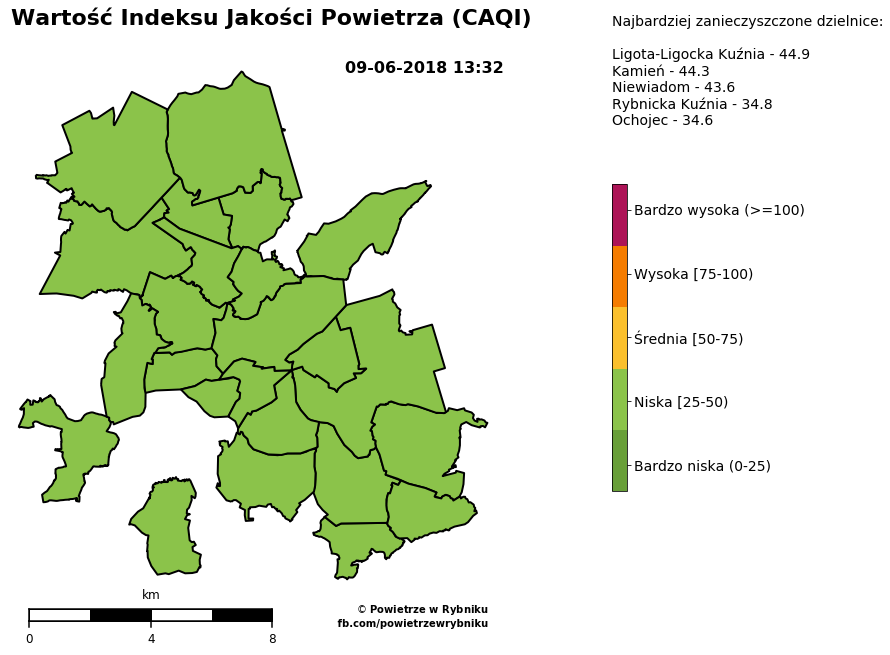

In [249]:
caqi_labels = ['Bardzo niska (0-25)',
 'Niska [25-50)',
 'Średnia [50-75)',
 'Wysoka [75-100)',
    'Bardzo wysoka (>=100)']

for i, text in enumerate(caqi_labels):
    caqi_labels[i] = text.decode('utf-8')
    

#cmap = colors.ListedColormap(['#4ca74a','#ffd800','#fb7551','#fb5656'])#,'#8e3ac4', '#b10000'])
cmap = colors.ListedColormap(['#689f38','#8bc34a','#fbc02d','#f57c00','#ad1457'])#,'#8e3ac4', '#b10000'])
bounds= [1,2,3,4,5,6]
norm = colors.BoundaryNorm(bounds, cmap.N)


plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='w', frame_on=False)
fig.patch.set_facecolor('#ffffff')
# use a blue colour ramp - we'll be converting it to a map using cmap()
#cmap = plt.get_cmap('RdYlGn_r')
# draw wards with grey outlines
df_map['patches'] = df_map['poly'].map(lambda x: PolygonPatch(x, ec='#000000', lw=2., alpha=1., zorder=4))
pc = PatchCollection(df_map['patches'], match_original=True)
# impose our colour map onto the patch collection
#norm = Normalize()
pc.set_facecolor(cmap(norm(df_map['pollutionLevel'].values)))
ax.add_collection(pc)


# Add a colour bar
cb = colorbar_index(ncolors=len(caqi_labels), cmap=cmap, shrink=0.5, labels=caqi_labels)
cb.ax.tick_params(labelsize=14)


# Show highest densities, in descending order
highest = '\n'.join(
    value[1] + " - " + str(round(value['currentMeasurements.airQualityIndex'],1)) for _, value in df_map.sort_values(by='currentMeasurements.airQualityIndex', ascending=False)[:5].iterrows()).decode('utf-8')


highest = 'Najbardziej zanieczyszczone dzielnice:\n\n' + highest
# Subtraction is necessary for precise y coordinate alignment
details = cb.ax.text(
    0., 1.55,
    highest,
    ha='left', va='top',
    size=14,
    color='#000000')

date = ax.text(
    .7, .95,
    current_time,
    ha='left', va='top',  weight = 'bold',
    size=16,
    color='#000000',
transform=ax.transAxes)


# Bin method, copyright and source data info
smallprint = ax.text(
    1.00, 0.025,
    '$\copyright$ Powietrze w Rybniku\n fb.com/powietrzewrybniku'.decode('utf-8'),
    ha='right', va='bottom',
    size=10,
    weight = 'bold',
    color='#000000',
    transform=ax.transAxes)


# Draw a map scale
m.drawmapscale(
    coords[0] + 0.06, coords[1] - 0.01,
    coords[0], coords[1], 
    8.,
    barstyle='fancy', labelstyle='simple',
    fillcolor1='w', fillcolor2='#000000',
    fontcolor='#000000', fontsize=12,
    zorder=5)


plt.title("Wartość Indeksu Jakości Powietrza (CAQI)".decode('utf-8'), fontsize=22, loc='left', weight='bold')


# this will set the image width to 1000px at 100dpi
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.1)
fig.set_size_inches(12, 10)
plt.savefig('pictures/cur_caqi_%s.png'%current_time_to_file, dpi=200, alpha=True, bbox_inches='tight')
plt.show()

# PM10

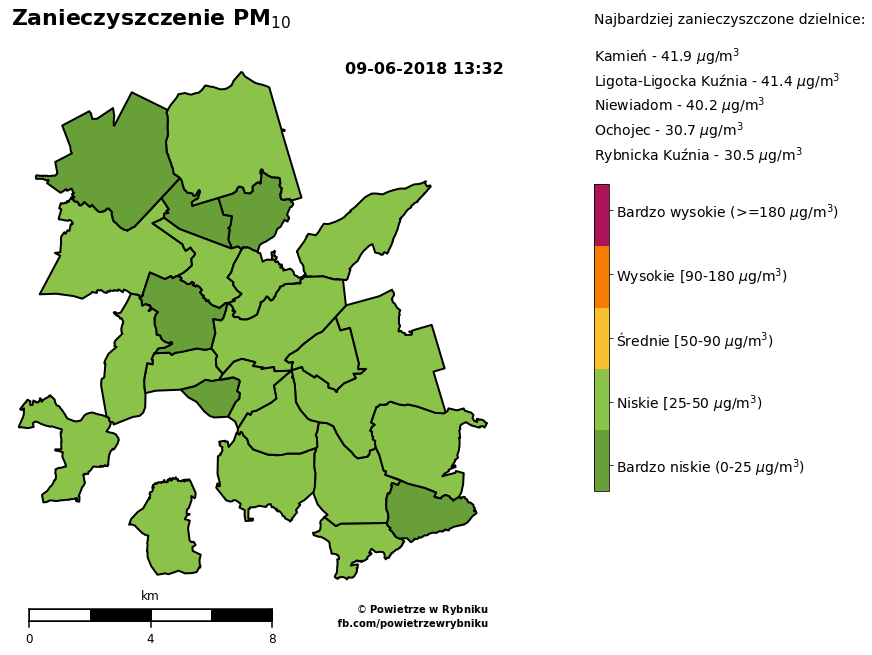

In [250]:
pm10_labels = ['Bardzo niskie (0-25 $\mu$g/m$^3$)',
 'Niskie [25-50 $\mu$g/m$^3$)',
 'Średnie [50-90 $\mu$g/m$^3$)',
 'Wysokie [90-180 $\mu$g/m$^3$)',
    'Bardzo wysokie (>=180 $\mu$g/m$^3$)']

for i, text in enumerate(pm10_labels):
    pm10_labels[i] = text.decode('utf-8')
    
from matplotlib import colors
cmap = colors.ListedColormap(['#689f38','#8bc34a','#fbc02d','#f57c00','#ad1457'])
bounds= [0,25,50,90,180,1000]
norm = colors.BoundaryNorm(bounds, cmap.N)


plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='w', frame_on=False)
fig.patch.set_facecolor('#ffffff')
# use a blue colour ramp - we'll be converting it to a map using cmap()
#cmap = plt.get_cmap('RdYlGn_r')
# draw wards with grey outlines
df_map['patches'] = df_map['poly'].map(lambda x: PolygonPatch(x, ec='#000000', lw=2., alpha=1., zorder=4))
pc = PatchCollection(df_map['patches'], match_original=True)
# impose our colour map onto the patch collection
#norm = Normalize()
pc.set_facecolor(cmap(norm(df_map['currentMeasurements.pm10'].values)))
ax.add_collection(pc)


# Add a colour bar
cb = colorbar_index(ncolors=len(pm10_labels), cmap=cmap, shrink=0.5, labels=pm10_labels)
cb.ax.tick_params(labelsize=14)


# Show highest densities, in descending order
highest = '\n'.join(
    value[1] + " - " + str(round(value['currentMeasurements.pm10'],1)) + " $\mu$g/m$^3$" for _, value in df_map.sort_values(by='currentMeasurements.pm10', ascending=False)[:5].iterrows()).decode('utf-8')


highest = 'Najbardziej zanieczyszczone dzielnice:\n\n' + highest
# Subtraction is necessary for precise y coordinate alignment
details = cb.ax.text(
    0., 1.55,
    highest,
    ha='left', va='top',
    size=14,
    color='#000000')

date = ax.text(
    .7, .95,
    current_time,
    ha='left', va='top',  weight = 'bold',
    size=16,
    color='#000000',
transform=ax.transAxes)


# Bin method, copyright and source data info
smallprint = ax.text(
    1.00, 0.025,
    '$\copyright$ Powietrze w Rybniku\n fb.com/powietrzewrybniku'.decode('utf-8'),
    ha='right', va='bottom',
    size=10,
    weight = 'bold',
    color='#000000',
    transform=ax.transAxes)


# Draw a map scale
m.drawmapscale(
    coords[0] + 0.06, coords[1] - 0.01,
    coords[0], coords[1], 
    8.,
    barstyle='fancy', labelstyle='simple',
    fillcolor1='w', fillcolor2='#000000',
    fontcolor='#000000', fontsize=12,
    zorder=5)


plt.title("Zanieczyszczenie PM$_{10}$".decode('utf-8'), fontsize=22, loc='left', weight='bold')


#Save the file
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.1)
fig.set_size_inches(12, 10)
plt.savefig('pictures/cur_pm10_%s.png'%current_time_to_file, dpi=200, alpha=True, bbox_inches='tight')
plt.show()

# PM 2.5

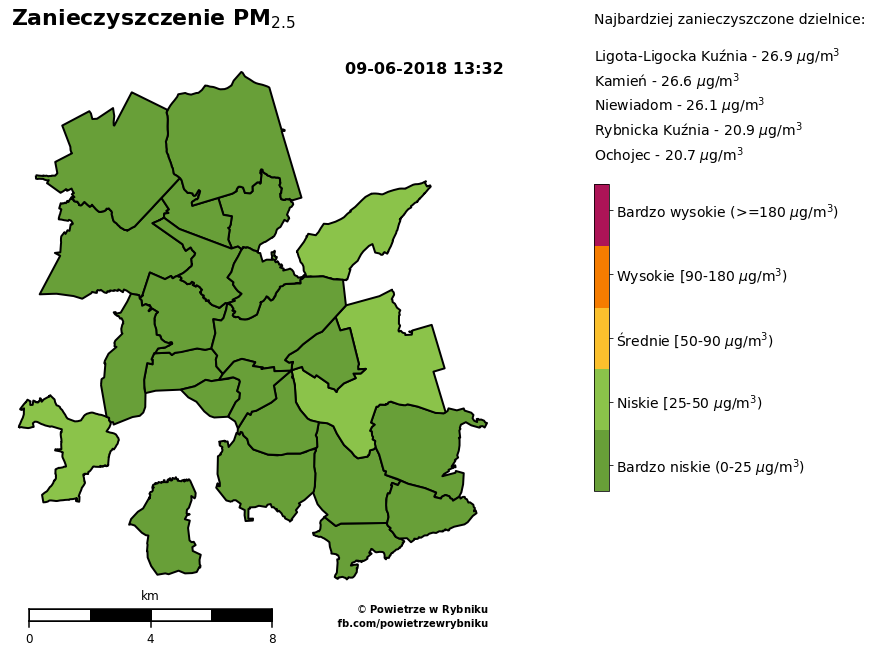

In [251]:
pm25_labels = ['Bardzo niskie (0-15 $\mu$g/m$^3$)',
 'Niskie [15-30 $\mu$g/m$^3$)',
 'Średnie [30-55 $\mu$g/m$^3$)',
 'Wysokie [55-110 $\mu$g/m$^3$)',
    'Bardzo wysokie (>=110 $\mu$g/m$^3$)']

for i, text in enumerate(pm25_labels):
    pm25_labels[i] = text.decode('utf-8')
    
from matplotlib import colors
cmap = colors.ListedColormap(['#689f38','#8bc34a','#fbc02d','#f57c00','#ad1457'])
bounds= [0,25,50,90,180,1000]
norm = colors.BoundaryNorm(bounds, cmap.N)


plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='w', frame_on=False)
fig.patch.set_facecolor('#ffffff')
# use a blue colour ramp - we'll be converting it to a map using cmap()
#cmap = plt.get_cmap('RdYlGn_r')
# draw wards with grey outlines
df_map['patches'] = df_map['poly'].map(lambda x: PolygonPatch(x, ec='#000000', lw=2., alpha=1., zorder=4))
pc = PatchCollection(df_map['patches'], match_original=True)
# impose our colour map onto the patch collection
#norm = Normalize()
pc.set_facecolor(cmap(norm(df_map['currentMeasurements.pm25'].values)))
ax.add_collection(pc)


# Add a colour bar
cb = colorbar_index(ncolors=len(pm25_labels), cmap=cmap, shrink=0.5, labels=pm25_labels)
cb.ax.tick_params(labelsize=14)


# Show highest densities, in descending order
highest = '\n'.join(
    value[1] + " - " + str(round(value['currentMeasurements.pm25'],1)) + " $\mu$g/m$^3$" for _, value in df_map.sort_values(by='currentMeasurements.pm25', ascending=False)[:5].iterrows()).decode('utf-8')


highest = 'Najbardziej zanieczyszczone dzielnice:\n\n' + highest
# Subtraction is necessary for precise y coordinate alignment
details = cb.ax.text(
    0., 1.55,
    highest,
    ha='left', va='top',
    size=14,
    color='#000000')

date = ax.text(
    .7, .95,
    current_time,
    ha='left', va='top',  weight = 'bold',
    size=16,
    color='#000000',
transform=ax.transAxes)


# Bin method, copyright and source data info
smallprint = ax.text(
    1.00, 0.025,
    '$\copyright$ Powietrze w Rybniku\n fb.com/powietrzewrybniku'.decode('utf-8'),
    ha='right', va='bottom',
    size=10,
    weight = 'bold',
    color='#000000',
    transform=ax.transAxes)


# Draw a map scale
m.drawmapscale(
    coords[0] + 0.06, coords[1] - 0.01,
    coords[0], coords[1], 
    8.,
    barstyle='fancy', labelstyle='simple',
    fillcolor1='w', fillcolor2='#000000',
    fontcolor='#000000', fontsize=12,
    zorder=5)


plt.title("Zanieczyszczenie PM$_{2.5}$".decode('utf-8'), fontsize=22, loc='left', weight='bold')


#Save the file
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.1)
fig.set_size_inches(12, 10)
plt.savefig('pictures/cur_pm25_%s.png'%current_time_to_file, dpi=200, alpha=True, bbox_inches='tight')
plt.show()

# Temperatura

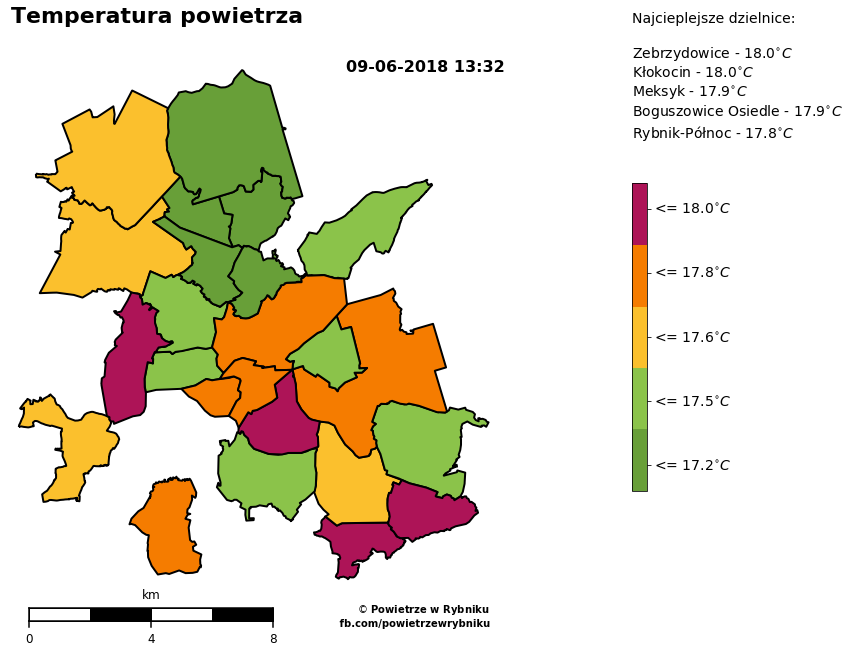

In [275]:
# curTemp_breaks = nb(
#     df_map[df_map['currentMeasurements.temperature'].notnull()]['currentMeasurements.temperature'].values,
#     initial=300,
#     k=5)
# # the notnull method lets us match indices when joining
# curTemp_jb = pd.DataFrame({'currentTemperature_bins': curTemp_breaks.yb}, index=df_map[df_map['currentMeasurements.temperature'].notnull()].index)
# df_map = df_map.join(curTemp_jb)

# curTemp_jenks_labels = ["<= %0.1f$^{\circ}C$" %b for b in curTemp_breaks.bins]


# # for i, text in enumerate(curTemp_jenks_labels):
# #     curTemp_jenks_labels[i] = text.decode('utf-8')
    
# from matplotlib import colors
# cmap = colors.ListedColormap(['#689f38','#8bc34a','#fbc02d','#f57c00','#ad1457'])
# #bounds= [0,25,50,90,180,1000]
# norm = Normalize()
# pc.set_facecolor(cmap(norm(df_map['currentTemperature_bins'].values)))


# plt.clf()
# fig = plt.figure()
# ax = fig.add_subplot(111, facecolor='w', frame_on=False)
# fig.patch.set_facecolor('#ffffff')
# # use a blue colour ramp - we'll be converting it to a map using cmap()
# #cmap = plt.get_cmap('RdYlGn_r')
# # draw wards with grey outlines
# df_map['patches'] = df_map['poly'].map(lambda x: PolygonPatch(x, ec='#000000', lw=2., alpha=1., zorder=4))
# pc = PatchCollection(df_map['patches'], match_original=True)
# # impose our colour map onto the patch collection
# #norm = Normalize()
# pc.set_facecolor(cmap(norm(df_map['currentTemperature_bins'].values)))
# ax.add_collection(pc)


# # Add a colour bar
# cb = colorbar_index(ncolors=len(curTemp_jenks_labels), cmap=cmap, shrink=0.5, labels=curTemp_jenks_labels)
# cb.ax.tick_params(labelsize=14)


# # Show highest densities, in descending order
# highest = '\n'.join(
#     value[1] + " - " + str(round(value['currentMeasurements.temperature'],1)) + "$^{\circ}C$" for _, value in df_map.sort_values(by='currentMeasurements.temperature', ascending=False)[:5].iterrows()).decode('utf-8')


# highest = 'Najcieplejsze dzielnice:\n\n' + highest
# # Subtraction is necessary for precise y coordinate alignment
# details = cb.ax.text(
#     0., 1.55,
#     highest,
#     ha='left', va='top',
#     size=14,
#     color='#000000')

# date = ax.text(
#     .7, .95,
#     current_time,
#     ha='left', va='top',  weight = 'bold',
#     size=16,
#     color='#000000',
# transform=ax.transAxes)


# # Bin method, copyright and source data info
# smallprint = ax.text(
#     1.00, 0.025,
#     '$\copyright$ Powietrze w Rybniku\n fb.com/powietrzewrybniku'.decode('utf-8'),
#     ha='right', va='bottom',
#     size=10,
#     weight = 'bold',
#     color='#000000',
#     transform=ax.transAxes)


# # Draw a map scale
# m.drawmapscale(
#     coords[0] + 0.06, coords[1] - 0.01,
#     coords[0], coords[1], 
#     8.,
#     barstyle='fancy', labelstyle='simple',
#     fillcolor1='w', fillcolor2='#000000',
#     fontcolor='#000000', fontsize=12,
#     zorder=5)


# plt.title("Temperatura powietrza".decode('utf-8'), fontsize=22, loc='left', weight='bold')


# #Save the file
# plt.tight_layout()
# plt.gcf().subplots_adjust(bottom=0.1)
# fig.set_size_inches(12, 10)
# plt.savefig('pictures/cur_temp_%s.png'%current_time_to_file, dpi=200, alpha=True, bbox_inches='tight')
# plt.show()

# Max of 24h history

# Common Air Quality Index

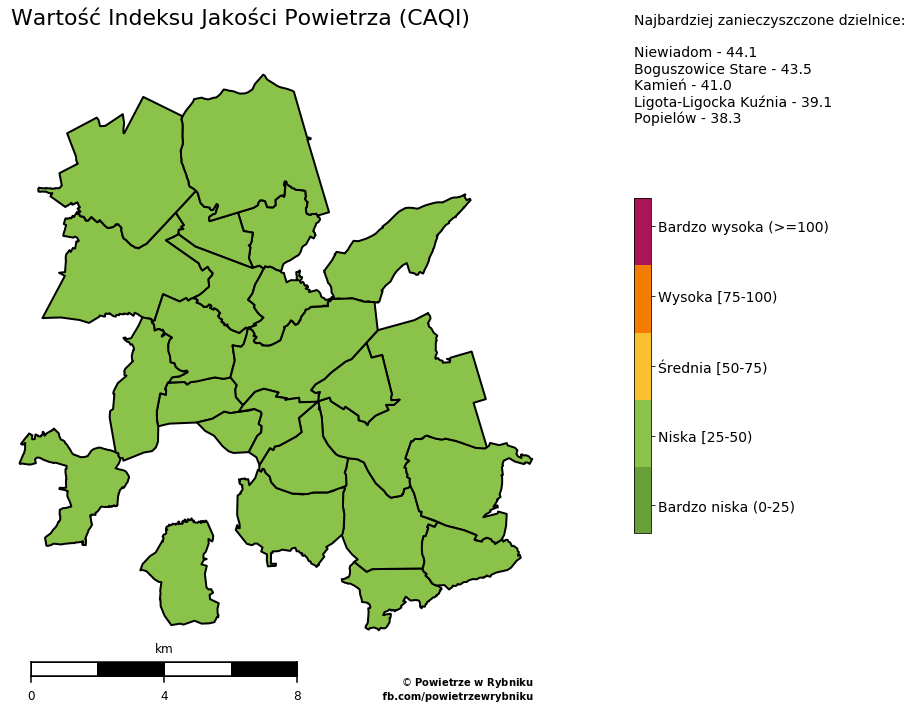

In [177]:
caqi_labels = ['Bardzo niska (0-25)',
 'Niska [25-50)',
 'Średnia [50-75)',
 'Wysoka [75-100)',
    'Bardzo wysoka (>=100)']

for i, text in enumerate(caqi_labels):
    caqi_labels[i] = text.decode('utf-8')
    

#cmap = colors.ListedColormap(['#4ca74a','#ffd800','#fb7551','#fb5656'])#,'#8e3ac4', '#b10000'])
cmap = colors.ListedColormap(['#689f38','#8bc34a','#fbc02d','#f57c00','#ad1457'])#,'#8e3ac4', '#b10000'])
bounds= [1,2,3,4,5,6]
norm = colors.BoundaryNorm(bounds, cmap.N)


plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='w', frame_on=False)
fig.patch.set_facecolor('#ffffff')
# use a blue colour ramp - we'll be converting it to a map using cmap()
#cmap = plt.get_cmap('RdYlGn_r')
# draw wards with grey outlines
df_map['patches'] = df_map['poly'].map(lambda x: PolygonPatch(x, ec='#000000', lw=2., alpha=1., zorder=4))
pc = PatchCollection(df_map['patches'], match_original=True)
# impose our colour map onto the patch collection
#norm = Normalize()
pc.set_facecolor(cmap(norm(df_map['pollutionLevelhist'].values)))
ax.add_collection(pc)


# Add a colour bar
cb = colorbar_index(ncolors=len(caqi_labels), cmap=cmap, shrink=0.5, labels=caqi_labels)
cb.ax.tick_params(labelsize=14)


# Show highest densities, in descending order
highest = '\n'.join(
    value[1] + " - " + str(round(value['airQualityIndex'],1)) for _, value in df_map.sort_values(by='airQualityIndex', ascending=False)[:5].iterrows()).decode('utf-8')


highest = 'Najbardziej zanieczyszczone dzielnice:\n\n' + highest
# Subtraction is necessary for precise y coordinate alignment
details = cb.ax.text(
    0., 1.55,
    highest,
    ha='left', va='top',
    size=14,
    color='#000000')

# Bin method, copyright and source data info
smallprint = ax.text(
    1.00, 0,
    '$\copyright$ Powietrze w Rybniku\n fb.com/powietrzewrybniku'.decode('utf-8'),
    ha='right', va='bottom',
    size=10,
    weight = 'bold',
    color='#000000',
    transform=ax.transAxes)



# # Mapscale label
# label = 'Wartość Indeksu Jakości Powietrza (CAQI)'
# mapscale_label = cb.ax.text(
#     0.05, -0.05,
#     label.decode('utf-8'),
#     ha='left', va='top',
#     size=12,
#     weight = 'bold',
#     color='#000000')

# Draw a map scale
m.drawmapscale(
    coords[0] + 0.06, coords[1] - 0.01,
    coords[0], coords[1], 
    8.,
    barstyle='fancy', labelstyle='simple',
    fillcolor1='w', fillcolor2='#000000',
    fontcolor='#000000', fontsize=12,
    zorder=5)


plt.title("Wartość Indeksu Jakości Powietrza (CAQI)".decode('utf-8'), fontsize=22, loc='left')


# this will set the image width to 1000px at 100dpi
plt.tight_layout()
fig.set_size_inches(12, 10)
plt.savefig('ryb-caqi.png', dpi=200, alpha=True)
plt.show()

# PM 10

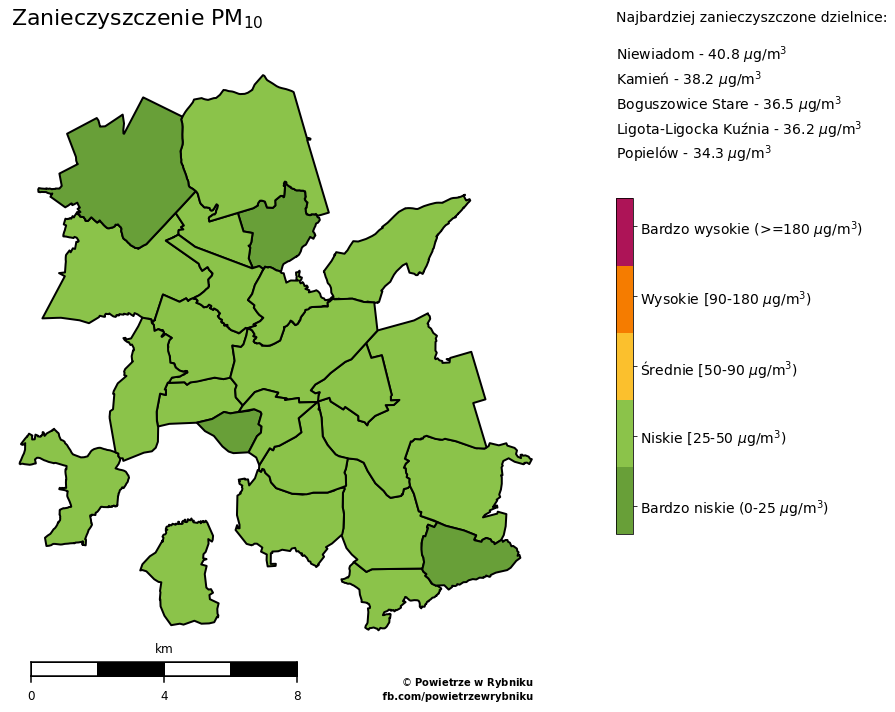

In [178]:
pm10_labels = ['Bardzo niskie (0-25 $\mu$g/m$^3$)',
 'Niskie [25-50 $\mu$g/m$^3$)',
 'Średnie [50-90 $\mu$g/m$^3$)',
 'Wysokie [90-180 $\mu$g/m$^3$)',
    'Bardzo wysokie (>=180 $\mu$g/m$^3$)']

for i, text in enumerate(pm10_labels):
    pm10_labels[i] = text.decode('utf-8')
    
from matplotlib import colors
cmap = colors.ListedColormap(['#689f38','#8bc34a','#fbc02d','#f57c00','#ad1457'])
bounds= [0,25,50,90,180,1000]
norm = colors.BoundaryNorm(bounds, cmap.N)


plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='w', frame_on=False)
fig.patch.set_facecolor('#ffffff')
# use a blue colour ramp - we'll be converting it to a map using cmap()
#cmap = plt.get_cmap('RdYlGn_r')
# draw wards with grey outlines
df_map['patches'] = df_map['poly'].map(lambda x: PolygonPatch(x, ec='#000000', lw=2., alpha=1., zorder=4))
pc = PatchCollection(df_map['patches'], match_original=True)
# impose our colour map onto the patch collection
#norm = Normalize()
pc.set_facecolor(cmap(norm(df_map['pm10'].values)))
ax.add_collection(pc)


# Add a colour bar
cb = colorbar_index(ncolors=len(pm10_labels), cmap=cmap, shrink=0.5, labels=pm10_labels)
cb.ax.tick_params(labelsize=14)


# Show highest densities, in descending order
highest = '\n'.join(
    value[1] + " - " + str(round(value['pm10'],1)) + r" $\mu$g/m$^3$" for _, value in df_map.sort_values(by='pm10', ascending=False)[:5].iterrows()).decode('utf-8')


highest = 'Najbardziej zanieczyszczone dzielnice:\n\n' + highest
# Subtraction is necessary for precise y coordinate alignment
details = cb.ax.text(
    0., 1.55,
    highest,
    ha='left', va='top',
    size=14,
    color='#000000')

# Bin method, copyright and source data info
smallprint = ax.text(
    1.00, 0,
    '$\copyright$ Powietrze w Rybniku\n fb.com/powietrzewrybniku'.decode('utf-8'),
    ha='right', va='bottom',
    size=10,
    weight = 'bold',
    color='#000000',
    transform=ax.transAxes)



# Draw a map scale
m.drawmapscale(
    coords[0] + 0.06, coords[1] - 0.01,
    coords[0], coords[1], 
    8.,
    barstyle='fancy', labelstyle='simple',
    fillcolor1='w', fillcolor2='#000000',
    fontcolor='#000000', fontsize=12,
    zorder=5)


plt.title("Zanieczyszczenie PM$_{10}$".decode('utf-8'), fontsize=22, loc='left')


# this will set the image width to 1000px at 100dpi
plt.tight_layout()
fig.set_size_inches(12, 10)
plt.savefig('ryb-pm10.png', dpi=200, alpha=True)
plt.show()

# PM 2.5

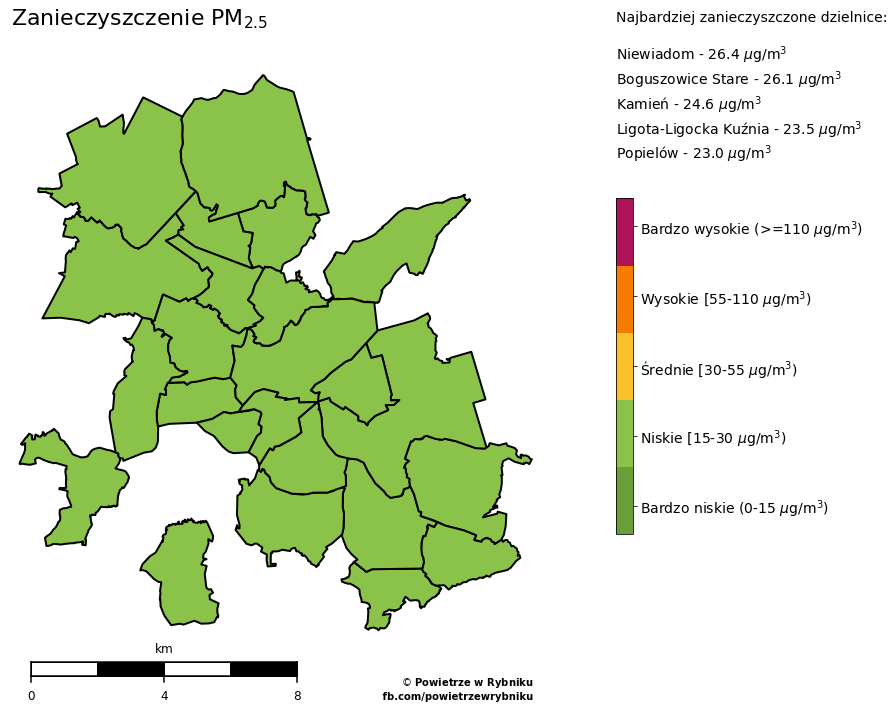

In [179]:
pm25_labels = ['Bardzo niskie (0-15 $\mu$g/m$^3$)',
 'Niskie [15-30 $\mu$g/m$^3$)',
 'Średnie [30-55 $\mu$g/m$^3$)',
 'Wysokie [55-110 $\mu$g/m$^3$)',
    'Bardzo wysokie (>=110 $\mu$g/m$^3$)']

for i, text in enumerate(pm25_labels):
    pm25_labels[i] = text.decode('utf-8')
    
from matplotlib import colors
cmap = colors.ListedColormap(['#689f38','#8bc34a','#fbc02d','#f57c00','#ad1457'])
bounds= [0,15,30,55,110,1000]
norm = colors.BoundaryNorm(bounds, cmap.N)

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='w', frame_on=False)
fig.patch.set_facecolor('#ffffff')
# use a blue colour ramp - we'll be converting it to a map using cmap()
#cmap = plt.get_cmap('RdYlGn_r')
# draw wards with grey outlines
df_map['patches'] = df_map['poly'].map(lambda x: PolygonPatch(x, ec='#000000', lw=2., alpha=1., zorder=4))
pc = PatchCollection(df_map['patches'], match_original=True)
# impose our colour map onto the patch collection
#norm = Normalize()
pc.set_facecolor(cmap(norm(df_map['pm25'].values)))
ax.add_collection(pc)


# Add a colour bar
cb = colorbar_index(ncolors=len(pm25_labels), cmap=cmap, shrink=0.5, labels=pm25_labels)
cb.ax.tick_params(labelsize=14)


# Show highest densities, in descending order
highest = '\n'.join(
    value[1] + " - " + str(round(value['pm25'],1)) + r" $\mu$g/m$^3$" for _, value in df_map.sort_values(by='pm25', ascending=False)[:5].iterrows()).decode('utf-8')


highest = 'Najbardziej zanieczyszczone dzielnice:\n\n' + highest
# Subtraction is necessary for precise y coordinate alignment
details = cb.ax.text(
    0., 1.55,
    highest,
    ha='left', va='top',
    size=14,
    color='#000000')

# Bin method, copyright and source data info
smallprint = ax.text(
    1.00, 0,
    '$\copyright$ Powietrze w Rybniku\n fb.com/powietrzewrybniku'.decode('utf-8'),
    ha='right', va='bottom',
    size=10,
    weight = 'bold',
    color='#000000',
    transform=ax.transAxes)



# Draw a map scale
m.drawmapscale(
    coords[0] + 0.06, coords[1] - 0.01,
    coords[0], coords[1], 
    8.,
    barstyle='fancy', labelstyle='simple',
    fillcolor1='w', fillcolor2='#000000',
    fontcolor='#000000', fontsize=12,
    zorder=5)


plt.title("Zanieczyszczenie PM$_{2.5}$".decode('utf-8'), fontsize=22, loc='left')


# this will set the image width to 1000px at 100dpi
plt.tight_layout()
fig.set_size_inches(12, 10)
plt.savefig('ryb-pm25.png', dpi=200, alpha=True)
plt.show()

# Forecast

In [235]:
f_max = pd.DataFrame(columns=['airQualityIndex','humidity','pm1','pm10', 'pm25', 'pollutionLevel','pressure', 'temperature'])
for j in range(len(allData)):
    forecast = pd.pivot_table(pd.DataFrame.from_dict(allData[j].forecast[0][0]).reset_index(), index=['fromDateTime', 'tillDateTime'], columns = 'index', values='measurements')
    for i in range(len(allData[j].forecast[0])-1):
        forecast = pd.concat([forecast, pd.pivot_table(pd.DataFrame.from_dict(allData[j].forecast[0][i+1]).reset_index(), index=['fromDateTime', 'tillDateTime'], columns = 'index', values='measurements')])
    f_max = pd.concat([f_max, forecast.max(axis=0,level=None).to_frame().T])

In [237]:
forecast

,index,airQualityIndex,pm25,pollutionLevel
fromDateTime,tillDateTime,,,
2018-05-02T14:00:00Z,2018-05-02T14:59:59Z,12.867171,7.720303,1.0
2018-05-02T15:00:00Z,2018-05-02T15:59:59Z,14.377715,8.626629,1.0
